In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
#################
### Todo
### 2. think about evolution in slope (changes in offsets, z values?)
####           a) Need to create upstream and downstream offsets, adjust
####              these in slope adjustment and fix flow depth calcs
####              to account for offsets.
####           B) tried approach of offset adjustment. this seemed unstable
####              if instead we adjust z_arr to bed and calc slope from z_arr, this seems to work
####              Had to adjust flow calculation because of this. z_arr-->z_arr-xc.ymin
### 3. create test cases
###########3
### 4. brainstorm model scenarios to run (do this next, then plan appropriate test cases)
###     A) Thinking about short time scales - how do seasonal patterns
###        reflect in average erosion rates. 
###          1. different scenarios with different length scales of exchange and dissolution 
#####        2. seasonal sinusoidal temp curve (ignore diurnal cycles?)
###     B) Single conduit evolution
###        1. how does long-term evolution differ with w/o CO2 exchange
###        2. what impact does slope-dependent exchange have?
###        3. shear-stress dependent production (based on grain size)
###        4. How do phreatic loops evolve
###        5. What happens during periods of base level fall, stasis, or aggradation?
#################################

### 5. how to deal with loss of point density (different resampling scheme?)

Populating the interactive namespace from numpy and matplotlib


In [75]:
#%%pixie_debugger
from CO2_sim_1D import CO2_1D

n=5
x = linspace(0,5000,n)
z = linspace(1,10,n)
np.random.seed(7)
r = 0.5*ones(n-1)# + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=0.5, 
             T_outside=20., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5,
             reduction_factor=0.05,
            dt_erode=1.,
            xc_n=1500)
ntimes = 500
fd_old=0.
for t in arange(ntimes):
    print('t=',t)
    sim.calc_flow_depths()
    fd_new = sim.fd_mids[0]
    if t>0 and np.abs(fd_new-fd_old)>0.05:
        print(asdf)
    fd_old = fd_new
    sim.calc_air_flow()
    #if sim.A_a.min()==0:
    #    print(asdf)
    sim.calc_steady_state_transport()
    sim.erode_xcs()
    sim.z_arr[0] -= 0.05
    #if t==160:
    #    print(asdf)
    if t % 1 == 0:
        timestep_str = '%04d' % (t,)
        print("Plotting timestep: ",t)
        figure()
        plot(sim.xcs[0].x ,sim.xcs[0].y)
        wl = sim.fd_mids[0]+ sim.xcs[0].y.min()
        plot([-.5,.5], [wl,wl])
        plot(sim.xcs[int(ceil(n/2))].x ,sim.xcs[int(ceil(n/2))].y)
        plot(sim.xcs[-1].x ,sim.xcs[-1].y)
        savefig('./XC-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(x, sim.h)
        plot(x,z)
        plot(x,sim.CO2_w)
        plot(x,sim.CO2_a)
        plot(x,sim.Ca)
        legend(['h','z','w','a','Ca'])
        savefig('./Profile-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(xmid,sim.slopes)
        plot(xmid, abs(sim.dz))
        yscale('log')
        tight_layout()
        savefig('./Slope-'+timestep_str+'.png')
        #figure()
        #loglog(sim.slopes, abs(sim.dz), 'o')
        #ylabel('dz')
        #xlabel('slope')
        #tight_layout()
        #savefig('./Slope_vs_erosion-'+timestep_str+'.png')
        close('all')

t= 0
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 0
Pw= 3.1394945620679247   A=, 0.7848719167995679
Q= 0.46618962205764997
norm_fd= -1   maxdepth= 0.9999994516877171
full
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 1
Pw= 3.1394945620679247   A=, 0.7848719167995679
Q= 0.46618962205764997
norm_fd= -1   maxdepth= 0.9999994516877171
full
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 2
Pw= 3.1394945620679247   A=, 0.7848719167995679
Q= 0.46618962205764997
norm_fd= -1   maxdepth= 0.9999994516877171
full
setting fd
done wit

t= 5
xc points= 1498  maxdpeth= 1.030664328684543   max_interp= 1.030664328684543
xc points= 1498  maxdpeth= 1.030664328684543   max_interp= 1.030664328684543
xc= 0
Pw= 3.2485020109445024   A=, 0.8388260371999977
Q= 0.5265441939397695
Q= 0.23514448241917377
Q= 0.32258391137737474
Q= 0.3848982709847781
Q= 0.43651855129009587
Q= 0.5056654325704499
Q= 0.5265441939397695
Q= 0.5071929544013375
Q= 0.4655193362927122
Q= 0.48717200084549017
Q= 0.4984321355204349
Q= 0.49705122058854523
Q= 0.5003648046406466
Q= 0.5023511867999132
Q= 0.5001281636515637
Q= 0.499717135586223
Q= 0.5000106161780086
Q= 0.49996250654630053
Q= 0.5000177438400144
Q= 0.4999964551447816
Q= 0.4999834862853051
Q= 0.4999964551447816
Q residual for 1.0198062172809135  = 3.544855218418075e-06
norm_fd= 1.0198062172809135   maxdepth= 1.030664328684543
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.040711200453329   max_interp= 1.040711200453329
xc points= 1498  maxdpeth= 1.040711200453329   m

t= 8
xc points= 1498  maxdpeth= 1.0425280458249653   max_interp= 1.0425280458249653
xc points= 1498  maxdpeth= 1.0425280458249653   max_interp= 1.0425280458249653
xc= 0
Pw= 3.3146041317142343   A=, 0.8708361264725939
Q= 0.5668252108289221
Q= 0.2508741525475926
Q= 0.34282568222616905
Q= 0.40667398419405104
Q= 0.4571882877769798
Q= 0.5050625162883068
Q= 0.5668252108289221
Q= 0.4845382894590617
Q= 0.5339258620344419
Q= 0.4980001919569211
Q= 0.4970764396046631
Q= 0.5001084073185004
Q= 0.5019373407004841
Q= 0.49993950142182253
Q= 0.4996504230479759
Q= 0.49997291430016577
Q= 0.5000088907567863
Q= 0.5000468752392133
Q= 0.5000033087119573
Q= 0.4999960025456002
Q= 0.5000033087119573
Q residual for 1.0127939094453013  = 3.3087119573060875e-06
norm_fd= 1.0127939094453013   maxdepth= 1.0425280458249653
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.053044189660718   max_interp= 1.053044189660718
xc points= 1498  maxdpeth= 1.053044189660718   max_interp= 1.0530

t= 11
xc points= 1498  maxdpeth= 1.0565832885814128   max_interp= 1.0565832885814128
xc points= 1498  maxdpeth= 1.0565832885814128   max_interp= 1.0565832885814128
xc= 0
Pw= 3.3771670007948407   A=, 0.9030218203783077
Q= 0.6084428296060613
Q= 0.2667677384486337
Q= 0.36210127001729403
Q= 0.4259483673121045
Q= 0.4730466584414685
Q= 0.509575633308195
Q= 0.5546347494665476
Q= 0.4966455939877953
Q= 0.4968316849670391
Q= 0.5009413993001879
Q= 0.504116270407496
Q= 0.5013744980578014
Q= 0.4996997373425938
Q= 0.4986082700894727
Q= 0.4994167111412589
Q= 0.5000627483918604
Q= 0.5003988772101345
Q= 0.5000198227037257
Q= 0.49994464351752266
Q= 0.5000011953434914
Q= 0.4999913124322063
Q= 0.500003201750945
Q= 0.49999881735588897
Q= 0.4999959507658527
Q= 0.49999881735588897
Q residual for 0.9826353961745463  = 1.1826441110307506e-06
norm_fd= 0.9826353961745463   maxdepth= 1.0565832885814128
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0666603751425043   max_inte

t= 14
xc points= 1498  maxdpeth= 1.0703985123947137   max_interp= 1.0703985123947137
xc points= 1498  maxdpeth= 1.0703985123947137   max_interp= 1.0703985123947137
xc= 0
Pw= 3.440049670445706   A=, 0.9351665830643856
Q= 0.6511156485583586
Q= 0.2782518648766208
Q= 0.3746501567567467
Q= 0.4367070254597637
Q= 0.47971953766757713
Q= 0.511070716297173
Q= 0.5179990195702366
Q= 0.4982978807725098
Q= 0.49086901571128705
Q= 0.5000127411729344
Q= 0.5041442443256431
Q= 0.5005728062548003
Q= 0.49971431234177344
Q= 0.5000678553371514
Q= 0.4999478326225119
Q= 0.5000029505672012
Q= 0.49999069626469544
Q= 0.5000005863775573
Q= 0.4999985116496472
Q= 0.5000005863775573
Q residual for 0.9345653264281154  = 5.863775572878538e-07
norm_fd= 0.9345653264281154   maxdepth= 1.0703985123947137
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.08221462669   max_interp= 1.08221462669
xc points= 1498  maxdpeth= 1.08221462669   max_interp= 1.08221462669
xc= 1
Pw= 3.4930028926865235

t= 17
xc points= 1498  maxdpeth= 1.0841416553031702   max_interp= 1.0841416553031702
xc points= 1498  maxdpeth= 1.0841416553031702   max_interp= 1.0841416553031702
xc= 0
Pw= 3.5028975910901017   A=, 0.9671416010989957
Q= 0.6946934901394364
Q= 0.288030042589854
Q= 0.3843744318156128
Q= 0.4442417948736276
Q= 0.48399337598141184
Q= 0.5106625116267743
Q= 0.5067690758020533
Q= 0.4987504681137253
Q= 0.49308751270143886
Q= 0.4998368929094203
Q= 0.5012803607913048
Q= 0.5000019673250841
Q= 0.5004890482814525
Q= 0.5000801637700569
Q= 0.49997946906467544
Q= 0.5000134718010358
Q= 0.4999984034352499
Q= 0.4999967883231122
Q= 0.5000000185628642
Q= 0.5000000185628642
Q residual for 0.876960192413767  = 1.8562864245730282e-08
norm_fd= 0.876960192413767   maxdepth= 1.0841416553031702
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0973916002447828   max_interp= 1.0973916002447828
xc points= 1498  maxdpeth= 1.0973916002447828   max_interp= 1.0973916002447828
xc= 1
Pw=

t= 20
xc points= 1261  maxdpeth= 1.098002615307533   max_interp= 1.0424969593399018
xc points= 1261  maxdpeth= 1.098002615307533   max_interp= 1.0424969593399018
xc= 0
Pw= 3.566179253577877   A=, 0.9988490955704297
Q= 0.7389619692884533
Q= 0.29556690166237093
Q= 0.3916553440736738
Q= 0.44953006183599775
Q= 0.4868062424831066
Q= 0.5106020479447753
Q= 0.5025544649570193
Q= 0.49935562375546133
Q= 0.4945186103660104
Q= 0.49944039747492863
Q= 0.5003706046901241
Q= 0.5012040323114035
Q= 0.5000348889383408
Q= 0.4999555305661061
Q= 0.5000175532599168
Q= 0.49999854903956825
Q= 0.4999821171198998
Q= 0.5000001139378125
Q= 0.5000037093872572
Q= 0.500001678839716
Q= 0.5000001139378125
Q residual for 0.8121453423661464  = 1.1393781251811674e-07
norm_fd= 0.8121453423661464   maxdepth= 1.098002615307533
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1122390988268378   max_interp= 1.1122390988268378
xc points= 1498  maxdpeth= 1.1122390988268378   max_interp= 1.1122

t= 23
xc points= 1123  maxdpeth= 1.112142542101821   max_interp= 0.9587172546050793
xc points= 1123  maxdpeth= 1.112142542101821   max_interp= 0.9587172546050793
xc= 0
Pw= 3.6285649069287738   A=, 1.030218712173669
Q= 0.7839149017807382
Q= 0.3014203455020224
Q= 0.3974572425348109
Q= 0.453877589982161
Q= 0.4887464074701409
Q= 0.5107080369723376
Q= 0.5003884113669934
Q= 0.4997884789433506
Q= 0.4979025042259317
Q= 0.4998047715422483
Q= 0.500021906118396
Q= 0.5001618728500263
Q= 0.49999257225156146
Q= 0.49992477327967244
Q= 0.49999102517728433
Q= 0.5000021364333489
Q= 0.5000096877104698
Q= 0.5000042343252037
Q= 0.4999994312448617
Q= 0.49999681133409407
Q= 0.4999994312448617
Q residual for 0.7448473396434427  = 5.687551383193323e-07
norm_fd= 0.7448473396434427   maxdepth= 1.112142542101821
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1268708863183805   max_interp= 1.1268708863183805
xc points= 1498  maxdpeth= 1.1268708863183805   max_interp= 1.1268708

t= 26
xc points= 1018  maxdpeth= 1.1267368438096126   max_interp= 0.8736244373552697
xc points= 1018  maxdpeth= 1.1267368438096126   max_interp= 0.8736244373552697
xc= 0
Pw= 3.684893201249313   A=, 1.0612216569534487
Q= 0.8300393887187318
Q= 0.30698528226675403
Q= 0.4020179659361876
Q= 0.4569036993584372
Q= 0.49047893943958115
Q= 0.5107980322558807
Q= 0.49922934668084556
Q= 0.5004204609108756
Q= 0.5017820932673712
Q= 0.5001165521130262
Q= 0.499926264260576
Q= 0.49994957755135333
Q= 0.5000060885663589
Q= 0.5000482860087367
Q= 0.4999995339268505
Q= 0.4999804531478683
Q= 0.4999968932300188
Q= 0.5000011057590396
Q= 0.4999995339268505
Q residual for 0.6764314478320453  = 4.66073149518742e-07
norm_fd= 0.6764314478320453   maxdepth= 1.1267368438096126
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1334  maxdpeth= 1.141379851217873   max_interp= 1.1218329204539566
xc points= 1334  maxdpeth= 1.141379851217873   max_interp= 1.1218329204539566
xc= 1
Pw= 3.7580147388250547   A=

t= 29
xc points= 930  maxdpeth= 1.1419398707709199   max_interp= 0.7899366480781258
xc points= 930  maxdpeth= 1.1419398707709199   max_interp= 0.7899366480781258
xc= 0
Pw= 3.7406287058152996   A=, 1.091823242750579
Q= 0.8766638323272623
Q= 0.3105055708036799
Q= 0.4058534408984466
Q= 0.4591232154157017
Q= 0.4915812829638448
Q= 0.5107479486692855
Q= 0.49865369307548096
Q= 0.5005988735339585
Q= 0.5022973792822204
Q= 0.5001354962070275
Q= 0.49983342708253425
Q= 0.5000202443609149
Q= 0.49999320616595255
Q= 0.49993625487192916
Q= 0.499991564981815
Q= 0.500001961903128
Q= 0.5000089452857799
Q= 0.5000039853835796
Q= 0.49999950068506643
Q= 0.49999709640522055
Q= 0.49999950068506643
Q residual for 0.6105535997518076  = 4.993149335663638e-07
norm_fd= 0.6105535997518076   maxdepth= 1.1419398707709199
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1200  maxdpeth= 1.155862765784624   max_interp= 1.065708655667142
xc points= 1200  maxdpeth= 1.155862765784624   max_interp= 1.065708

t= 32
xc points= 948  maxdpeth= 1.1579025879103555   max_interp= 0.710682861737419
xc points= 948  maxdpeth= 1.1579025879103555   max_interp= 0.710682861737419
xc= 0
Pw= 3.4294959746665543   A=, 1.1174684858231034
Q= 0.9658864213001344
Q= 0.3145448146489274
Q= 0.40842495541522406
Q= 0.46091744317791783
Q= 0.4924677415464269
Q= 0.5109649949657328
Q= 0.4983038658272229
Q= 0.5010031676767435
Q= 0.5010747310872536
Q= 0.49994287344040395
Q= 0.49931841637953045
Q= 0.5000777947960856
Q= 0.49996007300576734
Q= 0.5000025290355888
Q= 0.5000312816123775
Q= 0.4999979790134421
Q= 0.4999997837066208
Q= 0.4999997837066208
Q residual for 0.5478796109788938  = 2.162933792071442e-07
norm_fd= 0.5478796109788938   maxdepth= 1.1579025879103555
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1111  maxdpeth= 1.1704037436334387   max_interp= 1.0069100657947463
xc points= 1111  maxdpeth= 1.1704037436334387   max_interp= 1.0069100657947463
xc= 1
Pw= 3.881263815843229   A=, 1.174754424115653
Q

t= 35
xc points= 1039  maxdpeth= 1.1747735695816703   max_interp= 0.6357393276721921
xc points= 1039  maxdpeth= 1.1747735695816703   max_interp= 0.6357393276721921
xc= 0
Pw= 2.929627263309367   A=, 1.0590369459670739
Q= 0.9815580641042323
Q= 0.31713397672693366
Q= 0.41076517058882506
Q= 0.4625468722344976
Q= 0.49304383080057934
Q= 0.5112624124053509
Q= 0.49801006110775353
Q= 0.5013578266904678
Q= 0.500629779849142
Q= 0.4999024380823746
Q= 0.4991820681978434
Q= 0.499962052811049
Q= 0.5001256234186305
Q= 0.5000245538503523
Q= 0.5000099457403312
Q= 0.4999975330236364
Q= 0.4999839818412987
Q= 0.49999957031229625
Q= 0.5000017890686989
Q= 0.49999957031229625
Q residual for 0.4890686457171699  = 4.296877037512914e-07
norm_fd= 0.4890686457171699   maxdepth= 1.1747735695816703
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1037  maxdpeth= 1.1850910788803541   max_interp= 0.9475543910276163
xc points= 1037  maxdpeth= 1.1850910788803541   max_interp= 0.9475543910276163
xc= 1
P

t= 38
xc points= 1079  maxdpeth= 1.1926938384481591   max_interp= 0.5671418698110213
xc points= 1079  maxdpeth= 1.1926938384481591   max_interp= 0.5671418698110213
xc= 0
Pw= 2.649685330963469   A=, 0.9660534970566538
Q= 0.9147469962047935
Q= 0.3193326035265723
Q= 0.4128045847186448
Q= 0.46328784430632264
Q= 0.49339424672650034
Q= 0.5108433175317091
Q= 0.4981327021026723
Q= 0.5012867467349754
Q= 0.5005851824153517
Q= 0.4999086617475229
Q= 0.49923220024497167
Q= 0.4999628909400667
Q= 0.5001160929381406
Q= 0.5000214268423332
Q= 0.5000127796657792
Q= 0.4999974327906758
Q= 0.49998423987900037
Q= 0.4999996148297412
Q= 0.50000247638059
Q= 0.4999996148297412
Q residual for 0.4362653078471103  = 3.8517025879869493e-07
norm_fd= 0.4362653078471103   maxdepth= 1.1926938384481591
norm
getting width
got L,R
setting fd
done with this xc
xc points= 974  maxdpeth= 1.2000054987336823   max_interp= 0.8879812657113226
xc points= 974  maxdpeth= 1.2000054987336823   max_interp= 0.8879812657113226
xc= 1
Pw= 

t= 41
xc points= 1104  maxdpeth= 1.2118138501308   max_interp= 0.5043158650591959
xc points= 1104  maxdpeth= 1.2118138501308   max_interp= 0.5043158650591959
xc= 0
Pw= 2.432143927066556   A=, 0.8607842119226292
Q= 0.8163440093124148
Q= 0.32108098991954975
Q= 0.4138227233753772
Q= 0.46410589157238175
Q= 0.4932232318630509
Q= 0.5106401411560633
Q= 0.4981998244691244
Q= 0.501349452169561
Q= 0.5004708812462072
Q= 0.499922524617173
Q= 0.4992652132641305
Q= 0.4999456860561242
Q= 0.5000872618228784
Q= 0.49999977490576064
Q= 0.5000331964987466
Q= 0.4999947611750262
Q= 0.5000069430674885
Q= 0.5000023031703896
Q= 0.49999977490576064
Q residual for 0.3880638861895548  = 2.2509423935890283e-07
norm_fd= 0.3880638861895548   maxdepth= 1.2118138501308
norm
getting width
got L,R
setting fd
done with this xc
xc points= 918  maxdpeth= 1.215223177461683   max_interp= 0.8302370431209839
xc points= 918  maxdpeth= 1.215223177461683   max_interp= 0.8302370431209839
xc= 1
Pw= 4.041806672990748   A=, 1.2737680

t= 44
xc points= 1119  maxdpeth= 1.2322692545583174   max_interp= 0.4486634150817196
xc points= 1119  maxdpeth= 1.2322692545583174   max_interp= 0.4486634150817196
xc= 0
Pw= 2.2544025264585104   A=, 0.7573790884906224
Q= 0.7109100267912802
Q= 0.3219563704375491
Q= 0.41410540417010966
Q= 0.46436379507120923
Q= 0.4928234092688733
Q= 0.5098791645884688
Q= 0.49874344408718013
Q= 0.5011316134222735
Q= 0.5001737010648202
Q= 0.499977922317964
Q= 0.49950725130966805
Q= 0.49993073364480645
Q= 0.5000228483297728
Q= 0.49999961069141
Q= 0.5000023842282652
Q= 0.4999958810943979
Q= 0.49999961069141
Q residual for 0.3458921677867152  = 3.893085899764337e-07
norm_fd= 0.3458921677867152   maxdepth= 1.2322692545583174
norm
getting width
got L,R
setting fd
done with this xc
xc points= 868  maxdpeth= 1.230818194007972   max_interp= 0.7732244260825385
xc points= 868  maxdpeth= 1.230818194007972   max_interp= 0.7732244260825385
xc= 1
Pw= 4.0922806221812635   A=, 1.3056970810179602
Q= 0.8777393377935736
Q= 0

t= 47
xc points= 1130  maxdpeth= 1.254197586356745   max_interp= 0.4001306554346681
xc points= 1130  maxdpeth= 1.254197586356745   max_interp= 0.4001306554346681
xc= 0
Pw= 2.099274506389228   A=, 0.659982836098655
Q= 0.608381518706893
Q= 0.3218472058306164
Q= 0.4144278305426006
Q= 0.4643488348892426
Q= 0.49285966905189293
Q= 0.509288512407986
Q= 0.49939646049030884
Q= 0.5013956572499306
Q= 0.4991665583862679
Q= 0.5000879539000351
Q= 0.5005903487224186
Q= 0.4999989507016528
Q= 0.4997691718980444
Q= 0.499964834557885
Q= 0.5000130597149612
Q= 0.49999492052479244
Q= 0.5000021034066202
Q= 0.4999989507016528
Q residual for 0.30839855763552976  = 1.049298347211014e-06
norm_fd= 0.30839855763552976   maxdepth= 1.254197586356745
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1012  maxdpeth= 1.2468762703018754   max_interp= 0.718385995055686
xc points= 1012  maxdpeth= 1.2468762703018754   max_interp= 0.718385995055686
xc= 1
Pw= 3.3579063686891106   A=, 1.285251435568029
Q= 0.9

t= 50
xc points= 1137  maxdpeth= 1.27770258049549   max_interp= 0.3586473721178044
xc points= 1137  maxdpeth= 1.27770258049549   max_interp= 0.3586473721178044
xc= 0
Pw= 1.966083719416688   A=, 0.5739893555479751
Q= 0.517307339141397
Q= 0.3210145232558318
Q= 0.41409662238646827
Q= 0.46370008734993207
Q= 0.4924553509482449
Q= 0.508620918773378
Q= 0.5003731638937089
Q= 0.5014154746020546
Q= 0.4985823564657173
Q= 0.5000171016308496
Q= 0.4994722306681983
Q= 0.49996433070565777
Q= 0.5000442196587616
Q= 0.500001125542487
Q= 0.49999551081126586
Q= 0.5000046293774273
Q= 0.500001125542487
Q residual for 0.27668688572966615  = 1.1255424869904829e-06
norm_fd= 0.27668688572966615   maxdepth= 1.27770258049549
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1054  maxdpeth= 1.2634999408211667   max_interp= 0.6677723047553092
xc points= 1054  maxdpeth= 1.2634999408211667   max_interp= 0.6677723047553092
xc= 1
Pw= 3.1006894305043526   A=, 1.2306509646411403
Q= 0.925295734464239
Q= 0.

t= 53
xc points= 1141  maxdpeth= 1.3019045928151658   max_interp= 0.32332302869900564
xc points= 1141  maxdpeth= 1.3019045928151658   max_interp= 0.32332302869900564
xc= 0
Pw= 1.8446229983642763   A=, 0.49826205667946566
Q= 0.43802529587609484
Q= 0.31887333190799877
Q= 0.4122350479647622
Q= 0.4622813415949645
Q= 0.4910020291789236
Q= 0.5070016235869347
Q= 0.5029968237986804
Q= 0.5010946754861277
Q= 0.49735540945757994
Q= 0.5001860263868491
Q= 0.4996909063695522
Q= 0.5000838833946215
Q= 0.49997865366591865
Q= 0.4998690424479514
Q= 0.4999913997914723
Q= 0.5000140835190986
Q= 0.5000000661409194
Q= 0.500003763897089
Q= 0.49999636794896585
Q= 0.5000000661409194
Q residual for 0.25068750738180007  = 6.614091940804201e-08
norm_fd= 0.25068750738180007   maxdepth= 1.3019045928151658
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1081  maxdpeth= 1.2809636501510555   max_interp= 0.61759599157088
xc points= 1081  maxdpeth= 1.2809636501510555   max_interp= 0.61759599157088
xc= 1

t= 56
xc points= 1143  maxdpeth= 1.3335324761197134   max_interp= 0.292844065905335
xc points= 1143  maxdpeth= 1.3335324761197134   max_interp= 0.292844065905335
xc= 0
Pw= 1.7348858499755173   A=, 0.4296111631084491
Q= 0.36627483032317726
Q= 0.31595494609410774
Q= 0.41105781284087667
Q= 0.4619535408871593
Q= 0.4910249927072405
Q= 0.5083669562061459
Q= 0.5014091891879618
Q= 0.5007547404950532
Q= 0.4970289884800722
Q= 0.49974785673711786
Q= 0.49938452706617664
Q= 0.5000274096645375
Q= 0.5003064062809754
Q= 0.5000127463811276
Q= 0.49994685159566815
Q= 0.4999875853821068
Q= 0.4999999010265311
Q= 0.5000042864348091
Q= 0.4999955152947725
Q= 0.4999999010265311
Q residual for 0.22685654949139614  = 9.897346892051573e-08
norm_fd= 0.22685654949139614   maxdepth= 1.3335324761197134
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1106  maxdpeth= 1.303844155322139   max_interp= 0.5640896719170139
xc points= 1106  maxdpeth= 1.303844155322139   max_interp= 0.5640896719170139
xc= 1


t= 59
xc points= 1139  maxdpeth= 1.3602011213953031   max_interp= 0.2694691088812898
xc points= 1139  maxdpeth= 1.3602011213953031   max_interp= 0.2694691088812898
xc= 0
Pw= 1.637679187301905   A=, 0.3765816783658131
Q= 0.3134381250945814
Q= 0.3119680689194507
Q= 0.40704885877034663
Q= 0.45824705966292556
Q= 0.48855835259485686
Q= 0.5053013744305246
Q= 0.5069315939538135
Q= 0.5010276040263484
Q= 0.4965127632543232
Q= 0.5007227914627662
Q= 0.49960507171551866
Q= 0.49845111440762024
Q= 0.49985922350141215
Q= 0.5000721077111606
Q= 0.5000762547335121
Q= 0.49999239131929213
Q= 0.4999415970537154
Q= 0.5000031394668416
Q= 0.5000196012185966
Q= 0.49999898187761704
Q= 0.49999898187761704
Q residual for 0.21087735329603557  = 1.018122382956399e-06
norm_fd= 0.21087735329603557   maxdepth= 1.3602011213953031
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1119  maxdpeth= 1.3230349512443507   max_interp= 0.5189218484846573
xc points= 1119  maxdpeth= 1.3230349512443507   max_inter

t= 62
xc points= 1135  maxdpeth= 1.3885460808727648   max_interp= 0.25284134589736856
xc points= 1135  maxdpeth= 1.3885460808727648   max_interp= 0.25284134589736856
xc= 0
Pw= 1.5614483414922353   A=, 0.3365974773576914
Q= 0.27466991715055367
Q= 0.3083290226551966
Q= 0.4048335389169982
Q= 0.45715603658671483
Q= 0.4872776731283546
Q= 0.5053758934450294
Q= 0.5101466191540972
Q= 0.5011643689333894
Q= 0.49600085929599574
Q= 0.5005242349641141
Q= 0.4994569630561706
Q= 0.5001196430105165
Q= 0.49999958282763135
Q= 0.4997930724871903
Q= 0.49997856065941454
Q= 0.5000245293656381
Q= 0.5000043928460072
Q= 0.4999947722837434
Q= 0.49999958282763135
Q residual for 0.19837475038326402  = 4.1717236864968754e-07
norm_fd= 0.19837475038326402   maxdepth= 1.3885460808727648
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1126  maxdpeth= 1.3433265281948623   max_interp= 0.48058245397934246
xc points= 1126  maxdpeth= 1.3433265281948623   max_interp= 0.48058245397934246
xc= 1
Pw= 2.4450383

t= 65
xc points= 1126  maxdpeth= 1.4250523823728194   max_interp= 0.2385496058224652
xc points= 1126  maxdpeth= 1.4250523823728194   max_interp= 0.2385496058224652
xc= 0
Pw= 1.4854629463282518   A=, 0.29907877775208214
Q= 0.23856311253857632
Q= 0.30502664068139934
Q= 0.4017556542395764
Q= 0.455096082377288
Q= 0.486075350030586
Q= 0.5050897784587997
Q= 0.5137963905199259
Q= 0.5016724364207898
Q= 0.4957161210732723
Q= 0.5002128344230821
Q= 0.49940831317398154
Q= 0.5001775789457926
Q= 0.4999344701407795
Q= 0.499939903553937
Q= 0.5000186053167025
Q= 0.5000793506918646
Q= 0.5000261266946264
Q= 0.49999414529556946
Q= 0.49997342938972983
Q= 0.49998871408204054
Q= 0.5000012549816247
Q= 0.5000078824876608
Q= 0.5000012549816247
Q residual for 0.18778045619671796  = 1.2549816247320322e-06
norm_fd= 0.18778045619671796   maxdepth= 1.4250523823728194
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1137  maxdpeth= 1.3691208122359746   max_interp= 0.4376844376580882
xc points= 1137 

t= 68
xc points= 1119  maxdpeth= 1.4547900506197493   max_interp= 0.22879937684369683
xc points= 1119  maxdpeth= 1.4547900506197493   max_interp= 0.22879937684369683
xc= 0
Pw= 1.4222555956412422   A=, 0.27295969936939635
Q= 0.21509824049042692
Q= 0.3036317738805816
Q= 0.40000061569950424
Q= 0.45328882912501944
Q= 0.48516436732820756
Q= 0.5041642516967693
Q= 0.5162597400285456
Q= 0.5040177702556259
Q= 0.49850986290730587
Q= 0.49344179687478357
Q= 0.4986274093002225
Q= 0.5004879349190741
Q= 0.5004356902718604
Q= 0.4998557703406394
Q= 0.49938858403571873
Q= 0.49982346975835923
Q= 0.5000440951331382
Q= 0.5001939055518729
Q= 0.5000747549285924
Q= 0.4999880289379636
Q= 0.49993753624237286
Q= 0.4999966714551831
Q= 0.5000074304226335
Q= 0.4999966714551831
Q residual for 0.18058916250782242  = 3.328544816882939e-06
norm_fd= 0.18058916250782242   maxdepth= 1.4547900506197493
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.3907255646852765   max_interp= 0.4083

t= 71
xc points= 1096  maxdpeth= 1.5507732731683035   max_interp= 0.22097184263550862
xc points= 1096  maxdpeth= 1.5507732731683035   max_interp= 0.22097184263550862
xc= 0
Pw= 1.3426530362616034   A=, 0.23511741062743524
Q= 0.17790372928714904
Q= 0.3149975935473068
Q= 0.4093821616359728
Q= 0.4615399702761747
Q= 0.49369467010644286
Q= 0.5126704077730324
Q= 0.49724696116818584
Q= 0.5013836979791166
Q= 0.5011454035543182
Q= 0.4998120161284691
Q= 0.4988361357530306
Q= 0.4999989659250954
Q= 0.5002401493323118
Q= 0.5000130825137147
Q= 0.49995975560297007
Q= 0.499993113458266
Q= 0.500004818246647
Q= 0.4999989659250954
Q residual for 0.16962020084946564  = 1.0340749045933961e-06
norm_fd= 0.16962020084946564   maxdepth= 1.5507732731683035
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.4559269574021405   max_interp= 0.3809643122179368
xc points= 1140  maxdpeth= 1.4559269574021405   max_interp= 0.3809643122179368
xc= 1
Pw= 2.153974192456001   A=, 0.6628495834

t= 74
xc points= 1078  maxdpeth= 1.5849201756215678   max_interp= 0.20708925577317228
xc points= 1078  maxdpeth= 1.5849201756215678   max_interp= 0.20708925577317228
xc= 0
Pw= 1.2564761554782118   A=, 0.20717429430440817
Q= 0.1537940766319252
Q= 0.314543638884607
Q= 0.40602069229137133
Q= 0.45643024568017015
Q= 0.4863641051748699
Q= 0.5052529788666589
Q= 0.5141413276171176
Q= 0.5005548904711458
Q= 0.4972104362046258
Q= 0.5003012957188154
Q= 0.49945532632377676
Q= 0.4999757748104783
Q= 0.4999415202022712
Q= 0.5000552745633564
Q= 0.5000061198366464
Q= 0.49999953799953034
Q= 0.49999295739145605
Q= 0.49999953799953034
Q residual for 0.16330889212860647  = 4.6200046965871877e-07
norm_fd= 0.16330889212860647   maxdepth= 1.5849201756215678
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1132  maxdpeth= 1.4821704725046174   max_interp= 0.32100657948500944
xc points= 1132  maxdpeth= 1.4821704725046174   max_interp= 0.32100657948500944
xc= 1
Pw= 1.9370728492866998   A=, 0.5234

t= 77
xc points= 1077  maxdpeth= 1.6187932742829725   max_interp= 0.19862090238881386
xc points= 1077  maxdpeth= 1.6187932742829725   max_interp= 0.19862090238881386
xc= 0
Pw= 1.1961323707786877   A=, 0.18875363238237286
Q= 0.1385631367848666
Q= 0.31758752448910993
Q= 0.40863145574871856
Q= 0.45793508769404434
Q= 0.4867628506729984
Q= 0.5049900174881282
Q= 0.5142436289601808
Q= 0.5000120223658908
Q= 0.4962463724283193
Q= 0.4998897574407403
Q= 0.5018182100294636
Q= 0.500355011015785
Q= 0.5000531316885328
Q= 0.4999870972113101
Q= 0.5000194775852796
Q= 0.5000045699506354
Q= 0.4999971203379111
Q= 0.4999971203379111
Q residual for 0.1569949770019023  = 2.8796620888948965e-06
norm_fd= 0.1569949770019023   maxdepth= 1.6187932742829725
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1127  maxdpeth= 1.5068622333277948   max_interp= 0.30772257157579747
xc points= 1127  maxdpeth= 1.5068622333277948   max_interp= 0.30772257157579747
xc= 1
Pw= 1.8741105349740452   A=, 0.487200909

t= 80
xc points= 1078  maxdpeth= 1.6538983862284877   max_interp= 0.19002588409202645
xc points= 1078  maxdpeth= 1.6538983862284877   max_interp= 0.19002588409202645
xc= 0
Pw= 1.1358363502037667   A=, 0.1692194388599367
Q= 0.12196812608910272
Q= 0.32027321049251567
Q= 0.4108460296360504
Q= 0.45938959580838856
Q= 0.48880729150976454
Q= 0.5050432530614496
Q= 0.5083836482078276
Q= 0.49838972029277223
Q= 0.49737724473181993
Q= 0.5000383397177377
Q= 0.5018324905279742
Q= 0.4999815195494143
Q= 0.4997827969688139
Q= 0.4999753903766796
Q= 0.500001748960465
Q= 0.5000157175449936
Q= 0.49999561364239725
Q= 0.5000078861453556
Q= 0.500001748960465
Q residual for 0.14968862867194213  = 1.7489604650089419e-06
norm_fd= 0.14968862867194213   maxdepth= 1.6538983862284877
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1124  maxdpeth= 1.5319489477490325   max_interp= 0.2959268585994616
xc points= 1124  maxdpeth= 1.5319489477490325   max_interp= 0.2959268585994616
xc= 1
Pw= 1.8149347273

t= 83
xc points= 1093  maxdpeth= 1.6899807263306652   max_interp= 0.18124766977975934
xc points= 1093  maxdpeth= 1.6899807263306652   max_interp= 0.18124766977975934
xc= 0
Pw= 1.069119777304273   A=, 0.15216265202934548
Q= 0.10828844808011819
Q= 0.32218061815764093
Q= 0.412297550910881
Q= 0.4601436756062814
Q= 0.4888588474304216
Q= 0.5072127193438634
Q= 0.5044640711081979
Q= 0.4986596756113567
Q= 0.497883005153834
Q= 0.5002203810294532
Q= 0.501769116915719
Q= 0.5000555873439334
Q= 0.49972208666451123
Q= 0.4999875858532667
Q= 0.4998220479674393
Q= 0.4999760558294347
Q= 0.5000061178317072
Q= 0.49999932299032473
Q= 0.49999932299032473
Q residual for 0.14194025057747642  = 6.770096752650723e-07
norm_fd= 0.14194025057747642   maxdepth= 1.6899807263306652
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1121  maxdpeth= 1.5574431180362445   max_interp= 0.2866593485720342
xc points= 1121  maxdpeth= 1.5574431180362445   max_interp= 0.2866593485720342
xc= 1
Pw= 1.76246193285236

t= 86
xc points= 1093  maxdpeth= 1.7270988131227774   max_interp= 0.17177925485142037
xc points= 1093  maxdpeth= 1.7270988131227774   max_interp= 0.17177925485142037
xc= 0
Pw= 1.012406109064321   A=, 0.13615063833271768
Q= 0.09511812466023584
Q= 0.3221639095465487
Q= 0.4113887651711174
Q= 0.4584151356536888
Q= 0.4871422979080668
Q= 0.5033994446912705
Q= 0.5114924522257779
Q= 0.5042258889989907
Q= 0.49574800554858894
Q= 0.49953041806070764
Q= 0.49628758532348005
Q= 0.4995915240690604
Q= 0.5005468861426035
Q= 0.499950143967551
Q= 0.5001757611963467
Q= 0.4999584782110494
Q= 0.500023559887597
Q= 0.5000815373166533
Q= 0.5000050326035805
Q= 0.49999602000522136
Q= 0.4999876668058949
Q= 0.49999602000522136
Q residual for 0.13626638165051136  = 3.979994778635643e-06
norm_fd= 0.13626638165051136   maxdepth= 1.7270988131227774
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1127  maxdpeth= 1.5833111646343871   max_interp= 0.2787279713816728
xc points= 1127  maxdpeth= 1.58331116

t= 89
xc points= 1091  maxdpeth= 1.7651012123932897   max_interp= 0.16591040484796798
xc points= 1091  maxdpeth= 1.7651012123932897   max_interp= 0.16591040484796798
xc= 0
Pw= 0.9749085911209164   A=, 0.12508707025732513
Q= 0.0861808036598825
Q= 0.3248616206525864
Q= 0.41442993906000275
Q= 0.4625849072171817
Q= 0.48976207151781626
Q= 0.5097873946746493
Q= 0.5005583322854055
Q= 0.49995946740871233
Q= 0.49610668605080416
Q= 0.4992314118320201
Q= 0.49995132171208184
Q= 0.5001182064349745
Q= 0.500020102795829
Q= 0.5000072594920584
Q= 0.4999958077464666
Q= 0.49998766230693276
Q= 0.4999958077464666
Q residual for 0.12883135159175566  = 4.1922535333749344e-06
norm_fd= 0.12883135159175566   maxdepth= 1.7651012123932897
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1131  maxdpeth= 1.6095009144039052   max_interp= 0.27225620322092314
xc points= 1131  maxdpeth= 1.6095009144039052   max_interp= 0.27225620322092314
xc= 1
Pw= 1.6459749593898318   A=, 0.3776623385161714
Q= 0.2225

t= 92
xc points= 1085  maxdpeth= 1.8041398477506525   max_interp= 0.15691469115276785
xc points= 1085  maxdpeth= 1.8041398477506525   max_interp= 0.15691469115276785
xc= 0
Pw= 0.920203941921158   A=, 0.11154742260524217
Q= 0.07539943711698907
Q= 0.32403686727447445
Q= 0.41283486088023896
Q= 0.4594628572581159
Q= 0.4877729648964944
Q= 0.5023777444394996
Q= 0.5111968217356886
Q= 0.5039590175032715
Q= 0.49722367968038916
Q= 0.50008527786507
Q= 0.49993326961410695
Q= 0.4998355897317715
Q= 0.49999572869688813
Q= 0.5000044228156579
Q= 0.49998989284979384
Q= 0.49999572869688813
Q residual for 0.12425861197064943  = 4.271303111869074e-06
norm_fd= 0.12425861197064943   maxdepth= 1.8041398477506525
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1130  maxdpeth= 1.6359655052766704   max_interp= 0.2664885785937064
xc points= 1130  maxdpeth= 1.6359655052766704   max_interp= 0.2664885785937064
xc= 1
Pw= 1.5964077730283177   A=, 0.3577410839913323
Q= 0.2088496254442264
Q= 0.3049978

t= 95
xc points= 1077  maxdpeth= 1.8441019782026098   max_interp= 0.15007417621740027
xc points= 1077  maxdpeth= 1.8441019782026098   max_interp= 0.15007417621740027
xc= 0
Pw= 0.8788359370333518   A=, 0.10133624801047997
Q= 0.06741465761884632
Q= 0.32541221022401934
Q= 0.41383468516485855
Q= 0.4601994077868313
Q= 0.4870722898230107
Q= 0.5019066694580834
Q= 0.5105896817017659
Q= 0.4998601784822833
Q= 0.4952436310212887
Q= 0.499335712936058
Q= 0.5002841488698518
Q= 0.49995129171589403
Q= 0.5000297783279974
Q= 0.5000175074434193
Q= 0.4999969642515385
Q= 0.49997951769275467
Q= 0.5000033669473304
Q= 0.4999905617545625
Q= 0.4999969642515385
Q residual for 0.11916592281485468  = 3.0357484614995656e-06
norm_fd= 0.11916592281485468   maxdepth= 1.8441019782026098
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1126  maxdpeth= 1.6626813265261493   max_interp= 0.261278810417994
xc points= 1126  maxdpeth= 1.6626813265261493   max_interp= 0.261278810417994
xc= 1
Pw= 1.554873537528

t= 98
xc points= 1079  maxdpeth= 1.8850003142770229   max_interp= 0.1438435518169443
xc points= 1079  maxdpeth= 1.8850003142770229   max_interp= 0.1438435518169443
xc= 0
Pw= 0.8361460782467935   A=, 0.09201662434079275
Q= 0.06033324471017841
Q= 0.327244582898588
Q= 0.41528531385955675
Q= 0.4612697100333546
Q= 0.4886492625093008
Q= 0.5027068371084389
Q= 0.5123933794989798
Q= 0.5019479656811868
Q= 0.5002364597017636
Q= 0.49658526340410225
Q= 0.4989676367098793
Q= 0.5003142820427513
Q= 0.49989056922411285
Q= 0.4995476818746316
Q= 0.49993591704803864
Q= 0.5000251193583902
Q= 0.5000318639060853
Q= 0.49999525825802693
Q= 0.4999726371289282
Q= 0.5000006516560412
Q= 0.5000060418646819
Q= 0.5000006516560412
Q residual for 0.11313809932583596  = 6.516560412395123e-07
norm_fd= 0.11313809932583596   maxdepth= 1.8850003142770229
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1121  maxdpeth= 1.6896353788405967   max_interp= 0.25618495624424764
xc points= 1121  maxdpeth= 1.6896353

t= 101
xc points= 1073  maxdpeth= 1.9268522740279614   max_interp= 0.13769846610958753
xc points= 1073  maxdpeth= 1.9268522740279614   max_interp= 0.13769846610958753
xc= 0
Pw= 0.8005529988416376   A=, 0.08381678350468888
Q= 0.054067682469134
Q= 0.32917407870224025
Q= 0.41486793029675717
Q= 0.4598151194332801
Q= 0.4908149340541568
Q= 0.5048042675563938
Q= 0.5044099080491075
Q= 0.5034302317436157
Q= 0.49984521123395564
Q= 0.4967642889755212
Q= 0.5006269909457275
Q= 0.4996255759424395
Q= 0.5000595949106265
Q= 0.5001181978825693
Q= 0.49999521886352055
Q= 0.4999381405852979
Q= 0.5000029417576899
Q= 0.5000106596253286
Q= 0.5000029417576899
Q residual for 0.10667725015764072  = 2.941757689889357e-06
norm_fd= 0.10667725015764072   maxdepth= 1.9268522740279614
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1118  maxdpeth= 1.7168251568610318   max_interp= 0.25137258089088516
xc points= 1118  maxdpeth= 1.7168251568610318   max_interp= 0.25137258089088516
xc= 1
Pw= 1.476726083

t= 104
xc points= 1092  maxdpeth= 1.9698673439366754   max_interp= 0.12990518581013658
xc points= 1092  maxdpeth= 1.9698673439366754   max_interp= 0.12990518581013658
xc= 0
Pw= 0.785991900859145   A=, 0.07469045342668273
Q= 0.046287152875453506
Q= 0.32811754449165176
Q= 0.4128319919890779
Q= 0.45132777227843185
Q= 0.4930540218545043
Q= 0.499725404431236
Q= 0.500791574917865
Q= 0.48294574365929205
Q= 0.492633743089318
Q= 0.4971952579593909
Q= 0.4997681316478183
Q= 0.5001089859785155
Q= 0.5003754788068243
Q= 0.5000445625853679
Q= 0.4999766163028398
Q= 0.49998990563622425
Q= 0.5000041532668469
Q= 0.5000196055606642
Q= 0.5000041532668469
Q residual for 0.10393949201956305  = 4.153266846884662e-06
norm_fd= 0.10393949201956305   maxdepth= 1.9698673439366754
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1117  maxdpeth= 1.7442706655136284   max_interp= 0.2461676691462672
xc points= 1117  maxdpeth= 1.7442706655136284   max_interp= 0.2461676691462672
xc= 1
Pw= 1.436404403418

t= 107
xc points= 1020  maxdpeth= 2.0145734305624057   max_interp= 0.12366406628876572
xc points= 1020  maxdpeth= 2.0145734305624057   max_interp= 0.12366406628876572
xc= 0
Pw= 0.8128064907259924   A=, 0.06701092269661477
Q= 0.0389956616160567
Q= 0.3247466655558297
Q= 0.41262628411050795
Q= 0.4494582814390469
Q= 0.490111222259455
Q= 0.49393158094977774
Q= 0.4986584514719665
Q= 0.49861032377312886
Q= 0.4988919302320167
Q= 0.49889203922829256
Q= 0.49889224034180757
Q= 0.49889223451813214
Q= 0.4988922243997721
Q= 0.49889224034180757
Q residual for 0.09692566570495426  = 0.001107759658192431
norm_fd= 0.09692566570495426   maxdepth= 2.0145734305624057
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1115  maxdpeth= 1.7719906995861754   max_interp= 0.2401580552051684
xc points= 1115  maxdpeth= 1.7719906995861754   max_interp= 0.2401580552051684
xc= 1
Pw= 1.3968651230646048   A=, 0.2728708784688077
Q= 0.15099893005795417
Q= 0.3138676020760314
Q= 0.4051593966974773
Q= 0.45531

t= 110
xc points= 978  maxdpeth= 2.060163437094686   max_interp= 0.11980890229508154
xc points= 978  maxdpeth= 2.060163437094686   max_interp= 0.11980890229508154
xc= 0
Pw= 0.8448207665669132   A=, 0.06155778181560373
Q= 0.03394440990671713
Q= 0.3253240278574553
Q= 0.4147311895588327
Q= 0.45842114088813934
Q= 0.4862754020679681
Q= 0.4514259872019228
Q= 0.4843635332924401
Q= 0.48534265177747876
Q= 0.48668489234042406
Q= 0.48671028413906275
Q= 0.4867107705771182
Q= 0.48671080552313634
Q= 0.4867107939149323
Q= 0.48671080552313634
Q residual for 0.08946548098216799  = 0.013289194476863664
norm_fd= 0.08946548098216799   maxdepth= 2.060163437094686
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1114  maxdpeth= 1.8000432733799028   max_interp= 0.23446213664263788
xc points= 1114  maxdpeth= 1.8000432733799028   max_interp= 0.23446213664263788
xc= 1
Pw= 1.3560369000318717   A=, 0.25738814566521073
Q= 0.14089018756290278
Q= 0.3163645844574603
Q= 0.40725853543413676
Q= 0.45661

t= 113
xc points= 988  maxdpeth= 2.1073846327480057   max_interp= 0.11040184190128163
xc points= 988  maxdpeth= 2.1073846327480057   max_interp= 0.11040184190128163
xc= 0
Pw= 0.8341759397227944   A=, 0.05214719976660431
Q= 0.026839381326655802
Q= 0.31547095680547166
Q= 0.3991491823125343
Q= 0.4301767324019017
Q= 0.4708586526183047
Q= 0.4551925339102136
Q= 0.47086725384366185
Q= 0.4708324832984786
Q= 0.47097097409231253
Q= 0.4709742128293191
Q= 0.47097421360855796
Q= 0.47097419479420394
Q= 0.47097421360855796
Q residual for 0.08261699786812024  = 0.029025786391442043
norm_fd= 0.08261699786812024   maxdepth= 2.1073846327480057
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1113  maxdpeth= 1.8284529819044169   max_interp= 0.22806917101831428
xc points= 1113  maxdpeth= 1.8284529819044169   max_interp= 0.22806917101831428
xc= 1
Pw= 1.3149301028887346   A=, 0.24156190378959214
Q= 0.13056957092655733
Q= 0.31828618449188356
Q= 0.40861415111701666
Q= 0.4571646992199908
Q= 0.

t= 116
xc points= 861  maxdpeth= 2.156126805975128   max_interp= 0.09123976593360014
xc points= 861  maxdpeth= 2.156126805975128   max_interp= 0.09123976593360014
xc= 0
Pw= 0.7617350357393738   A=, 0.037984883532641345
Q= 0.017591358953137848
Q= 0.285800037435409
Q= 0.36129903771436506
Q= 0.39731911665602343
Q= 0.4299421870711777
Q= 0.4205126538551619
Q= 0.43028628408805875
Q= 0.43045262653397376
Q= 0.4304545322038909
Q= 0.43045454350654405
Q= 0.43045453726643573
Q= 0.43045454350654405
Q residual for 0.06944226896879388  = 0.06954545649345595
norm_fd= 0.06944226896879388   maxdepth= 2.156126805975128
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1111  maxdpeth= 1.8572740884714714   max_interp= 0.22093536206729184
xc points= 1111  maxdpeth= 1.8572740884714714   max_interp= 0.22093536206729184
xc= 1
Pw= 1.2752398248971406   A=, 0.22578528147074664
Q= 0.12028111850157884
Q= 0.3193872259851561
Q= 0.4094814094934918
Q= 0.4573282299242683
Q= 0.48547861127326125
Q= 0.5027

t= 119
xc points= 924  maxdpeth= 2.2056226649749626   max_interp= 0.09424682100876777
xc points= 924  maxdpeth= 2.2056226649749626   max_interp= 0.09424682100876777
xc= 0
Pw= 0.6966213179552558   A=, 0.036802023547718304
Q= 0.017670700657961228
Q= 0.290408768743634
Q= 0.36586136669543473
Q= 0.39729123715146725
Q= 0.42263996130542697
Q= 0.4415698315055358
Q= 0.44426636885713067
Q= 0.4456638015748356
Q= 0.44681472137145495
Q= 0.4455736311392332
Q= 0.4468937451829249
Q= 0.4468984074595708
Q= 0.4468987324544236
Q= 0.44689872297844846
Q= 0.446898692036259
Q= 0.4468987324544236
Q residual for 0.07730441861311867  = 0.053101267545576425
norm_fd= 0.07730441861311867   maxdepth= 2.2056226649749626
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1107  maxdpeth= 1.8865215334102792   max_interp= 0.21476465204374484
xc points= 1107  maxdpeth= 1.8865215334102792   max_interp= 0.21476465204374484
xc= 1
Pw= 1.2397191337113216   A=, 0.21218697994911956
Q= 0.11157839308423667
Q= 0.320

t= 122
xc points= 890  maxdpeth= 2.25591363745587   max_interp= 0.07967330451399043
xc points= 890  maxdpeth= 2.25591363745587   max_interp= 0.07967330451399043
xc= 0
Pw= 0.7516829726142729   A=, 0.028299008851822682
Q= 0.011552440880055002
Q= 0.2723856807617046
Q= 0.3439707501720557
Q= 0.3595352715170852
Q= 0.3738361119488127
Q= 0.41035475422932877
Q= 0.4004435528512514
Q= 0.41180746913357746
Q= 0.4137057063199185
Q= 0.41236512625159816
Q= 0.4138036792544081
Q= 0.41381205505026963
Q= 0.4138125473915018
Q= 0.4138125424220838
Q= 0.41381249121534813
Q= 0.4138125473915018
Q residual for 0.062493560198013616  = 0.0861874526084982
norm_fd= 0.062493560198013616   maxdepth= 2.25591363745587
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1106  maxdpeth= 1.9162159851982792   max_interp= 0.20845238535849087
xc points= 1106  maxdpeth= 1.9162159851982792   max_interp= 0.20845238535849087
xc= 1
Pw= 1.2024894836938111   A=, 0.19858661121588483
Q= 0.10298580420339942
Q= 0.32207095

t= 125
xc points= 617  maxdpeth= 2.308323910923813   max_interp= 0.07548489649540323
xc points= 617  maxdpeth= 2.308323910923813   max_interp= 0.07548489649540323
xc= 0
Pw= 0.9127730492907928   A=, 0.024296281191775626
Q= 0.008397395278442086
Q= 0.2626418157286823
Q= 0.32500022162115233
Q= 0.35760478393490175
Q= 0.3693150350828014
Q= 0.3961864515165201
Q= 0.3969801037808802
Q= 0.39946516178623087
Q= 0.3994469075918546
Q= 0.3994659810871034
Q= 0.3994660692743878
Q= 0.39946604060675667
Q= 0.3994660692743878
Q residual for 0.06175125172596811  = 0.10053393072561218
norm_fd= 0.06175125172596811   maxdepth= 2.308323910923813
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1105  maxdpeth= 1.9463680839421662   max_interp= 0.20205986548120589
xc points= 1105  maxdpeth= 1.9463680839421662   max_interp= 0.20205986548120589
xc= 1
Pw= 1.1659992688241774   A=, 0.18606904624212567
Q= 0.09525958578691994
Q= 0.3228734312371662
Q= 0.41221711659417815
Q= 0.45947726180928466
Q= 0.48720

t= 128
xc points= 968  maxdpeth= 2.3624867535472913   max_interp= 0.06114799165215173
xc points= 968  maxdpeth= 2.3624867535472913   max_interp= 0.06114799165215173
xc= 0
Pw= 0.46501901871326173   A=, 0.01646544172880049
Q= 0.0066073933191362995
Q= 0.2263459598523951
Q= 0.28559482362608357
Q= 0.31233435724002995
Q= 0.3303062361970213
Q= 0.34220482452803663
Q= 0.33705838010990014
Q= 0.34228860884152335
Q= 0.3416789027090361
Q= 0.3423700355739173
Q= 0.34238276635865905
Q= 0.3423827829514228
Q= 0.3423827138280893
Q= 0.3423827829514228
Q residual for 0.04870308203945152  = 0.15761721704857717
norm_fd= 0.04870308203945152   maxdepth= 2.3624867535472913
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1102  maxdpeth= 1.9770033014097947   max_interp= 0.19571235611195223
xc points= 1102  maxdpeth= 1.9770033014097947   max_interp= 0.19571235611195223
xc= 1
Pw= 1.131382556064228   A=, 0.1736818684695977
Q= 0.08760236865228199
Q= 0.32320702749538344
Q= 0.4120819337535757
Q= 0.45

t= 131
xc points= 828  maxdpeth= 2.417490947201321   max_interp= 0.05177715069348032
xc points= 828  maxdpeth= 2.417490947201321   max_interp= 0.05177715069348032
xc= 0
Pw= 0.4953449313354556   A=, 0.012018706873885246
Q= 0.004018505175433604
Q= 0.20333624139341752
Q= 0.2555944863762369
Q= 0.2774338180553615
Q= 0.30265593635468624
Q= 0.2952544251657217
Q= 0.30326074082051047
Q= 0.30261400942089783
Q= 0.3033823518611543
Q= 0.30339742124991875
Q= 0.30339752406415493
Q= 0.30339740862293896
Q= 0.30339752406415493
Q residual for 0.039258097913889754  = 0.19660247593584507
norm_fd= 0.039258097913889754   maxdepth= 2.417490947201321
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1102  maxdpeth= 2.0080814743513757   max_interp= 0.18977257370076703
xc points= 1102  maxdpeth= 2.0080814743513757   max_interp= 0.18977257370076703
xc= 1
Pw= 1.0939277935324596   A=, 0.16272674068695914
Q= 0.08115969207570686
Q= 0.32413709118633444
Q= 0.41231418329946434
Q= 0.45946163607592333
Q= 

/home/mcoving/Data/github/CO2-speleogenesis/crossSection.py:297: RuntimeWarning: divide by zero encountered in double_scalars
  return abs(A**3/W - Q**2/g)


t= 134
xc points= 722  maxdpeth= 2.4761945308654636   max_interp= 0.03684278095764151
xc points= 722  maxdpeth= 2.4761945308654636   max_interp= 0.03684278095764151
xc= 0
Pw= 0.6388239900686307   A=, 0.006147955206382727
Q= 0.0013026245389961175
Q= 0.14363324156176777
Q= 0.16888028917982034
Q= 0.17379038767173544
Q= 0.17501499249154048
Q= 0.18207417228849532
Q= 0.18900139867438792
Q= 0.18840097924209492
Q= 0.1893809972748891
Q= 0.1893894553577657
Q= 0.18938990536511424
Q= 0.1893899113410999
Q= 0.1893898650150243
Q= 0.1893899113410999
Q residual for 0.03009624591485136  = 0.3106100886589001
norm_fd= 0.03009624591485136   maxdepth= 2.4761945308654636
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1098  maxdpeth= 2.0396557035589935   max_interp= 0.18432154620558205
xc points= 1098  maxdpeth= 2.0396557035589935   max_interp= 0.18432154620558205
xc= 1
Pw= 1.0633183869030571   A=, 0.15280393081247298
Q= 0.07528611016002858
Q= 0.32463424433085775
Q= 0.4133714088287464
Q= 0

t= 137
xc points= 902  maxdpeth= 2.533991013692728   max_interp= 0.028504254059923767
xc points= 902  maxdpeth= 2.533991013692728   max_interp= 0.028504254059923767
xc= 0
Pw= 0.21678801479557297   A=, 0.003189343374281506
Q= 0.0008406662032633309
Q= 0.11332254545022437
Q= 0.13402932698909653
Q= 0.14388442547023572
Q= 0.1547413886834447
Q= 0.1548141555563046
Q= 0.15516686492821583
Q= 0.1551540660088644
Q= 0.15534343185138585
Q= 0.1553212796650988
Q= 0.15534454359747057
Q= 0.1553448741702677
Q= 0.15534486490455027
Q= 0.15534482468443764
Q= 0.1553448741702677
Q residual for 0.021846126683218163  = 0.3446551258297323
norm_fd= 0.021846126683218163   maxdepth= 2.533991013692728
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1100  maxdpeth= 2.0730062392629733   max_interp= 0.1662074882496578
xc points= 1100  maxdpeth= 2.0730062392629733   max_interp= 0.1662074882496578
xc= 1
Pw= 0.9785705981364259   A=, 0.12902842149367483
Q= 0.0611700442643441
Q= 0.3114651986085106
Q= 0.3

/home/mcoving/Data/github/CO2-speleogenesis/crossSection.py:297: RuntimeWarning: divide by zero encountered in double_scalars
  return abs(A**3/W - Q**2/g)


t= 139
xc points= 619  maxdpeth= 2.5710216917853153   max_interp= 0.025994876793516856
xc points= 619  maxdpeth= 2.5710216917853153   max_interp= 0.025994876793516856
xc= 0
Pw= 1.2545169552552462   A=, 0.0031583910995405667
Q= 0.00034582654352412564
Q= 0.0829135253422792
Q= 0.10347525804370587
Q= 0.1164483847135063
Q= 0.11293634672457155
Q= 0.11730396350559796
Q= 0.1204605925923938
Q= 0.12150837955801606
Q= 0.12126276651647015
Q= 0.1217270935355772
Q= 0.12145852743356847
Q= 0.12173723337541892
Q= 0.12173771911285283
Q= 0.12173769051998162
Q= 0.12173771911285283
Q residual for 0.01860014809863987  = 0.3782622808871472
norm_fd= 0.01860014809863987   maxdepth= 2.5710216917853153
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1094  maxdpeth= 2.095820402254133   max_interp= 0.1643605403506424
xc points= 1094  maxdpeth= 2.095820402254133   max_interp= 0.1643605403506424
xc= 1
Pw= 0.9636632206731045   A=, 0.12426860558787545
Q= 0.05841430777216676
Q= 0.31119407961132267
Q=

/home/mcoving/Data/github/CO2-speleogenesis/crossSection.py:297: RuntimeWarning: divide by zero encountered in double_scalars
  return abs(A**3/W - Q**2/g)


t= 140
xc points= 534  maxdpeth= 2.58579243939416   max_interp= 0.02325018512329984
xc points= 534  maxdpeth= 2.58579243939416   max_interp= 0.02325018512329984
xc= 0
Pw= 1.1554716022123384   A=, 0.004394778729228679
Q= 0.0005928281768307641
Q= 0.0882116886031497
Q= 0.10696921399387475
Q= 0.11514991238340394
Q= 0.15121675070927812
Q= 0.16511275939596393
Q= 0.17155598630282057
Q= 0.17233924200634365
Q= 0.17194998146218218
Q= 0.1760528385857168
Q= 0.1809049823759889
Q= 0.18478389678718968
Q= 0.18743064133150084
Q= 0.1891411375455689
Q= 0.19022195143136872
Q= 0.19089781923020235
Q= 0.19131826891578438
Q= 0.19157910344586895
Q= 0.19174066805367523
Q= 0.19174066805367523
Q residual for 0.020454433655828386  = 0.30825933194632477
norm_fd= 0.020454433655828386   maxdepth= 2.58579243939416
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1092  maxdpeth= 2.107229347421865   max_interp= 0.16393060611378546
xc points= 1092  maxdpeth= 2.107229347421865   max_interp= 0.16393060611

NameError: name 'asdf' is not defined

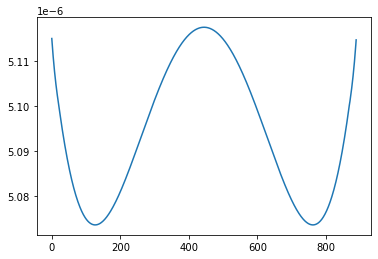

In [74]:
F_xc = sim.xcs[3].F_xc 
plot(F_xc)
#plot(sim.xcs[3].F_xc)
#plot(sim.xcs[25].F_xc)
#len(sim.xcs)
#fil_F = savgol_filter(F_xc,35,3)
#plot(fil_F)
#ceil(len(fil_F)/35)//2*2+1

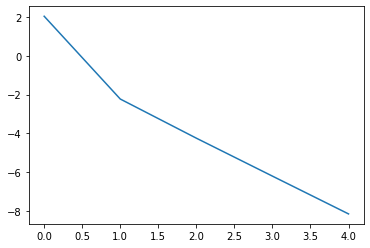

In [36]:
z = linspace(0,1,n)
total_dz = z - sim.z_arr
total_dz = total_dz #- total_dz[0]
plot(total_dz)

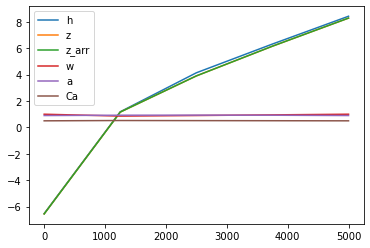

In [77]:
x = linspace(0,5000,n)
#z = linspace(0,1,n)

xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
plot(x,sim.z_arr)

#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','z_arr','w','a','Ca'])


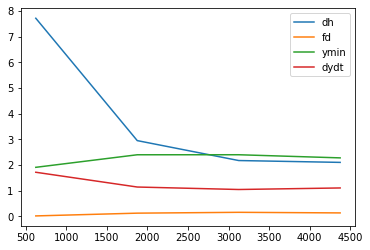

In [78]:
xmid = (x[1:] + x[:-1])/2.
plot(xmid, sim.h[1:]-sim.h[:-1])
plot(xmid,sim.fd_mids)

ymins = []
dydt = []
for i in arange(n-1):
    #print('i=',i, '  ymin=',sim.xcs[i].y.min())
    ymins.append(sim.xcs[i].ymin)
    dydt.append(sim.xcs[i].dr.max())
    
plot(xmid,array(ymins)+4.)
plot(xmid,array(dydt)*100)
legend(['dh','fd','ymin','dydt'])

slopes= [0.00613046 0.00219086 0.0018007  0.00170249]
eslopes= [0.006170463905038665, 0.0023619618361024656, 0.0017416099199791995, 0.001684095542090499]


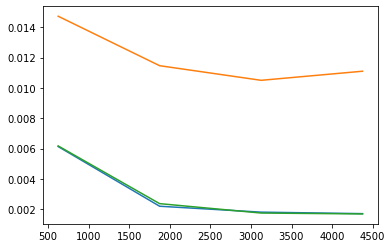

In [79]:
plot(xmid,sim.slopes)
print('slopes=',sim.slopes)
plot(xmid, abs(sim.dz))
#plot(xmid, sim.fd_mids/500)

T_bs = []
As = []
ws = []
eslopes = []
for i in arange(n-1):
    #T_bs.append(sim.xcs[i].calcT_b())
    As.append(sim.xcs[i].calcA(wantidx=sim.xcs[i].wetidx))
    L,R = sim.xcs[i].findLR(sim.fd_mids[i])
    ws.append(sim.xcs[i].x[R] - sim.xcs[i].x[L] )
    eslopes.append((sim.h[i+1] - sim.h[i])/sim.L_arr[i-1])
#plot(xmid,array(As)/200.)
#plot(xmid,array(ws)/400.)
plot(xmid,eslopes)
#ylim([0,0.002])
print('eslopes=',eslopes)

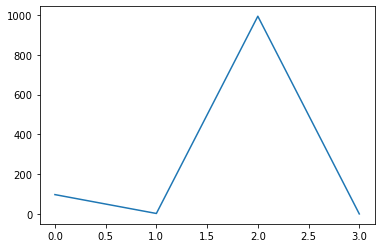

In [6]:
plot(sim.h[1:] - sim.h[:-1])


In [76]:
sim.flow_type

array(['norm', 'dwnscrit', 'norm', 'norm'], dtype=object)

In [ ]:
from scipy.interpolate import splprep,splev,interp1d

In [ ]:
splprep()
splev()
interp1d()

In [ ]:
print(sim.flow_type)
print(sim.A_a)
print(sim.A_w)
print(sim.fd_mids)
for i in arange(n-1):
    print('i=',i, '  ymin=',sim.xcs[i].y.min())

Q= 0.0025721896058908135
Q= 0.0049278874283652805
Q= 0.007199904854368749
Q= 0.009390031206519666
Q= 0.011500055789052964
Q= 0.01353176788853384
Q= 0.01548695677472839
Q= 0.01736741170164674
Q= 0.019174921908775594
Q= 0.020911276622517655
Q= 0.022578265057856883
Q= 0.02417767642026902
Q= 0.025711299907898034
Q= 0.027180924714019786
Q= 0.028588340029814915
Q= 0.029935335047473505
Q= 0.0312236989636545
Q= 0.03245522098332298
Q= 0.033631690323988064
Q= 0.03475489622036427
Q= 0.03582662792947779
Q= 0.036848674736237874
Q= 0.03782282595949268
Q= 0.0387508709585851
Q= 0.0396345991404223
Q= 0.0404757999670685
Q= 0.04127626296386585
Q= 0.04203777772808333
Q= 0.04276213393808667
Q= 0.04345112136301553
Q= 0.04410652987294523
Q= 0.04473014944950125
Q= 0.04532377019688386
Q= 0.045889182353248674
Q= 0.04642817630237608
Q= 0.046942542585548495
Q= 0.04743407191354063
Q= 0.047904555178611474
Q= 0.04835578346637149
Q= 0.04878954806738301
Q= 0.049207640488334634
Q= 0.04961185246261623
Q= 0.0500039759601

/home/mcoving/Data/github/CO2-speleogenesis/crossSection.py:297: RuntimeWarning: divide by zero encountered in double_scalars
  return abs(A**3/W - Q**2/g)


Q= 0.2933468036523461
Q= 0.29428866081793065
Q= 0.2952054515960437
Q= 0.2960992728824028
Q= 0.2969722194422543
Q= 0.2978263837842138
Q= 0.29866385606369783
Q= 0.2994867240152252
Q= 0.3002970729129375
Q= 0.30109698555873876
Q= 0.30188854229751305
Q= 0.30267382105891205
Q= 0.3034548974252486
Q= 0.3042338447250571
Q= 0.3050127341519017
Q= 0.3057936349080408
Q= 0.30657861437255385
Q= 0.30736973829355735
Q= 0.30816907100412966
Q= 0.30897867566156173
Q= 0.309800614509553
Q= 0.3106365227963739
Q= 0.31148477683606207
Q= 0.3123422516436342
Q= 0.31320581752262466
Q= 0.3140723477119701
Q= 0.3149387180645028
Q= 0.3158018068382086
Q= 0.31665849459774814
Q= 0.31750566422382526
Q= 0.3183402010280848
Q= 0.3191589929713125
Q= 0.3199589309828177
Q= 0.32073690937897986
Q= 0.32148982637905393
Q= 0.32221458471644077
Q= 0.3229080923437466
Q= 0.32356726323007606
Q= 0.324189018249126
Q= 0.32477028615677656
Q= 0.3253080046570014
Q= 0.3257991215550594
Q= 0.32624059599705857
Q= 0.3266294009546578
Q= 0.3269642572

Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.4091609176186838
Q= 0.40916

/home/mcoving/Data/github/CO2-speleogenesis/crossSection.py:297: RuntimeWarning: divide by zero encountered in double_scalars
  return abs(A**3/W - Q**2/g)
/home/mcoving/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1815: RuntimeWarning: invalid value encountered in double_scalars
  q = (xf - fulc) * (fx - fnfc)


0.5

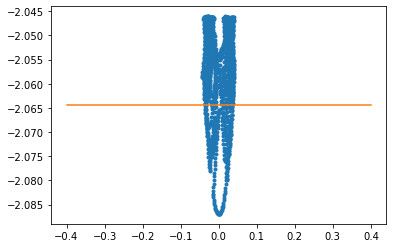

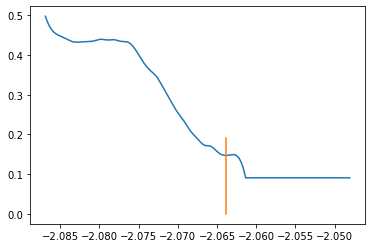

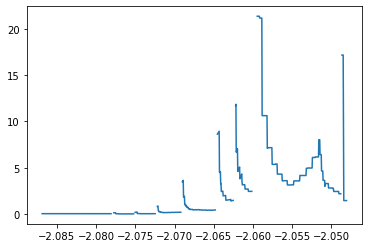

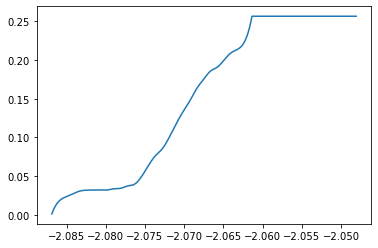

In [80]:
from scipy.signal import savgol_filter

i=0

g=9.8
f=0.1
x=sim.xcs[i].x
y=sim.xcs[i].y
xp=sim.xcs[i].xp
yp=sim.xcs[i].yp
xm=sim.xcs[i].xm
ym=sim.xcs[i].ym
plot(x,y,'.')
wl = sim.fd_mids[i] + y.min()
#wl_old = fd_old + y.min()
plot([-.4,.4],[wl,wl])
#plot([-.4,.4],[wl_old,wl_old],'--')
#xlim([-2.8,2.8])
#ylim([-1.4,-1.35])
maxdepth = y.max() - y.min()
fds=maxdepth*linspace(0.001,0.95,1000)
res=[]
res_alt=[]
res2 = []
As = []
Pws = []
for fd in fds:
    A = sim.xcs[i].A_interp(fd)
    P = sim.xcs[i].P_interp(fd)
    D_H = 4.*A/P
    Q = sign(sim.slopes[i])*A*sqrt(2.*g*abs(sim.slopes[i])*D_H/f)
    res_alt.append(A*sqrt(D_H)-sim.Q_w/(sign(sim.slopes[i])*sqrt(2.*g*abs(sim.slopes[i])/f)))#(abs(sim.Q_w - Q)))
    
    res.append(sim.xcs[i].abs_normal_discharge_residual(fd,sim.slopes[i],0.1,sim.Q_w))
    As.append(sim.xcs[i].calcA(wantidx=y-y.min()<fd))
    Pws.append(sim.xcs[i].calcP(wantidx=y-y.min()<fd))
    res2.append(sim.xcs[i].abs_crit_flow_depth_residual(fd,sim.Q_w))

As = array(As)
fil_As = savgol_filter(As,35,1)


figure()
plot(fds+y.min(),res)
norm_fd_y = sim.xcs[i].calcNormalFlowDepth(sim.Q_w,sim.slopes[i],f=f,old_fd=sim.fd_mids[i]) + y.min()
plot([norm_fd_y,norm_fd_y], [0.0,0.19])
print('norm_fd=',norm_fd_y)
#plot(fds*maxdepth+y.min(),res2)

#plot(fds*maxdepth+y.min(),res_alt)
#plot(fil_As,res_alt)
#xlim([-4,-3])

#ylim([-.05,.2])
#ylim([-0.05,0.05])
figure()
plot(fds+y.min(),res2)
crit_fd_y = sim.xcs[i].calcCritFlowDepth(sim.Q_w)+y.min()
print('crit fd, y=',crit_fd_y)
plot([crit_fd_y,crit_fd_y],[0.001,0.003])
#xlim([-4,-3])
#print(res[0]-res[1])


figure()
#sim.xcs[i].create_A_interp()
#A_spline=sim.xcs[i].AfromSpline(fds*maxdepth)
#sim.xcs[i].create_P_interp()


#plot(fds*maxdepth+y.min(),As)
#plot(fds*maxdepth+y.min(),fil_As)
plot(fds+y.min(),sim.xcs[i].A_interp(fds))

#figure()
#plot(fds*maxdepth+y.min(),Pws)
#plot(fds*maxdepth+y.min(),sim.xcs[i].P_interp(fds))

#figure()

#Pws = array(Pws)
#Qs = fil_As*sqrt(4*fil_As/Pws)
#plot(fds*maxdepth+y.min(),Qs)

#print(Pws[0])
#sim.fd_mids[i]+y.min()
sim.xcs[i].abs_normal_discharge_residual(-3.4-y.min(), sim.slopes[i], 0.1, sim.Q_w)
#-3.67486-y.min()

In [ ]:
fds

In [ ]:
Tb=sim.xcs[-1].T_b
ywet = y[sim.xcs[-1].wetidx]
xwet = x[sim.xcs[-1].wetidx]
#plot(xwet[1:],Tb[1:]-Tb[:-1])
#plot(xwet,Tb)
dr=sim.xcs[-1].dr
#plot(xwet[1:],dr[1:]-dr[:-1])
plot(xwet,dr)

In [ ]:
from scipy.signal import savgol_filter

fil_dr = savgol_filter(dr,15,3,mode='wrap')
plot(xwet,dr,xwet,fil_dr)
figure()
plot(fil_dr[1:]-fil_dr[:-1])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,pwpFromSolution,pwp_to_mm_yr

In [ ]:
concCaEqFromPCO2()

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,calc_K_H
g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
rho_w = 998.2#kg/m^3
D_Ca = 10**-9#m^2/s
nu = 1.3e-6#m^2/s at 10 C
Sc = nu/D_Ca
g_mol_CaCO3 = 100.09
L_per_m3 = 1000.
secs_per_year =  3.154e7
secs_per_hour = 60.*60.


#print(Sc)

In [ ]:
sim.update_dimnless_params()
sim.initialize_conc_arrays()

K_w = sim.gas_transf_vel*sim.W/sim.A_w
K_a = sim.gas_transf_vel*sim.W/sim.A_a
        

F = np.zeros(sim.n_nodes - 1)
F_palmer = np.zeros(sim.n_nodes - 1)

mm_yr_to_mols_sec = 100.*rho_limestone/g_mol_CaCO3/secs_per_year/100./(sim.D_H_w/2.)

i=sim.n_nodes-1
this_CO2_w = sim.CO2_w[i]*sim.pCO2_high
this_CO2_a = sim.CO2_a[i]*sim.pCO2_high
this_Ca = sim.Ca[i]*sim.Ca_eq_0
#if palmer:
sol = solutionFromCaPCO2(this_Ca, this_CO2_w, T_C=sim.T_cave)
F_pwp = pwp_to_mm_yr(pwpFromSolution(sol,PCO2=this_CO2_w))
F_palmer[i-1] = palmerFromSolution(sol, PCO2=this_CO2_w)
R_palmer = F_palmer[i-1]*mm_yr_to_mols_sec[i-1]
this_xc = sim.xcs[i-1]
eSlope = (sim.h[i] - sim.h[i-1])/sim.L_arr[i-1]
this_xc.setEnergySlope(eSlope)
this_xc.setMaxVelPoint(sim.fd_mids[i-1])
this_xc.calcUmax(sim.Q_w)
T_b = this_xc.calcT_b()
eps = 5*nu*Sc**(-1./3.)/np.sqrt(T_b/rho_w)
#print(eps)
Ca_Eq = concCaEqFromPCO2(this_CO2_w, T_C=sim.T_cave)
#print(this_Ca,Ca_Eq)
F_xc = (D_Ca/eps)*(Ca_Eq - this_Ca)*L_per_m3
P_w = this_xc.wet_ls.sum()
A_w = this_xc.calcA(this_xc.wetidx)
F[i-1] = np.sum(F_xc*this_xc.wet_ls)/P_w #Units of F are mols/m^2/sec
R = F[i-1]*P_w*sim.L_arr[i-1]#4.*F[i-1]/sim.D_H_w[i-1]
sim.F = F
R_CO2 = R/sim.K_H
#dx is negative, so signs on dC terms flip
dCO2_a = -sim.L_arr[i-1]*K_a[i-1]/sim.V_a[i-1]*(this_CO2_w - this_CO2_a)
dCO2_w = sim.L_arr[i-1]*K_w[i-1]/sim.V_w[i-1]*(this_CO2_w - this_CO2_a) - R_CO2/sim.Q_w/L_per_m3#sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
dCa = R/sim.Q_w/L_per_m3#-sim.L_arr[i-1]*R/sim.V_w[i-1]/(sim.L_arr[i-1]*A_w)/L_per_m3
print(dCO2_a,dCO2_w,dCa)
sim.CO2_a[i-1] = (this_CO2_a + dCO2_a)/sim.pCO2_high
sim.CO2_w[i-1] = (this_CO2_w + dCO2_w)/sim.pCO2_high
sim.Ca[i-1] = (this_Ca + dCa)/sim.Ca_eq_0


In [ ]:
print(sim.Q_w)
print(A_w*sim.V_w[i-1])
sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
R_CO2/sim.Q_w/L_per_m3

In [ ]:
this_xc.x[this_xc.wetidx].shape
F_xc.

In [ ]:
Re = abs(sim.V_w[i-1])*sim.D_H_w[i-1]/nu
print(Re)
f = 0.1
Sh = (f/8)*(Re-1000)*Sc/(1+12.7*sqrt(f/8)*(Sc**(2./3.) - 1))
print(Sh)
eps_test = sim.D_H_w[i-1]/Sh
print(eps_test)

In [ ]:
D_Ca/eps_test

In [ ]:
sim.D_H_w[i-1]

In [ ]:
eSlope

In [ ]:
cm_m=100.
F_to_m_yr = g_mol_CaCO3*secs_per_year/rho_limestone/cm_m**3
print(F_to_m_yr*sim.xcs[0].F_xc)